# Part 3 - Employ notebooks to synthesize query project results

## Objectives: 
This notebook is provided as part of the Project 1: Query Project of W205 - Fundamentals of Data Engineering Course in the Spring 2020 semester at UC Berkeley.

This notebook will answer the two project questions:

1) What are the 5 most popular trips that you would call "commuter trips"?

2) What are your recommendations for offers (justify based on your findings)?

#### Importing necessary packages including Pandas:

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Question 1: What are the top 5 most popular trips that you would call "commuter trips"?

I would classify a commuter trip as one that occurs between Monday through Friday between the hours of 8am to 6pm. 
A trip is defined as a start station and an end station. 
The following SQL query will group all trips by the start station and end station and count the frequency based on the conditions that I specified.

In [43]:
%%bigquery

SELECT start_station_name, end_station_name, count(*) as trip_freq
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK from start_date) BETWEEN 2 AND 6 AND EXTRACT(HOUR from start_date) BETWEEN 8 AND 18
GROUP BY start_station_name, end_station_name
ORDER BY trip_freq DESC LIMIT 5

,start_station_name,end_station_name,trip_freq
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),6676
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6057
2,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,5755
3,Embarcadero at Sansome,Steuart at Market,5591
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),5520


## Answer: The top 5 most popular trips that I would call "commuter trips" are provided in the table above and listed below.

1) 2nd at Townsend to 
   Harry Bridges Plaza (Ferry Building)

2) San Francisco Caltrain 2 (330 Townsend) to 
   Townsend at 7th

3) Harry Bridges Plaza (Ferry Building) to 
   Embarcadero at Sansome

4) Embarcadero at Sansome to 
   Steuart at Market

5) Embarcadero at Folsom to 
   San Francisco Caltrain (Townsend at 4th)

## Question 2: What are your recommendations for offers (justify based on your findings)?
My recommendations are based on the findings below. A summary at the end will answer this question.

#### The following provides a comparison between commuter trips and all trips for the above top 5 start/end stations.


Let's store the top 5 most popular commuter trips to a pandas dataframe.

In [ ]:
%%bigquery Most_Freq_CT

SELECT start_station_name, end_station_name, count(*) as trip_freq
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK from start_date) BETWEEN 2 AND 6 AND EXTRACT(HOUR from start_date) BETWEEN 8 AND 18
GROUP BY start_station_name, end_station_name
ORDER BY trip_freq DESC LIMIT 5

Executing query with job ID: ebaab014-0c65-477a-9d95-1477046aacfb
Query executing: 0.41s

In [111]:
Most_Freq_CT = Most_Freq_CT.set_index('start_station_name')
Most_Freq_CT

,end_station_name,trip_freq
start_station_name,,
2nd at Townsend,Harry Bridges Plaza (Ferry Building),6676
San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6057
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,5755
Embarcadero at Sansome,Steuart at Market,5591
Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),5520


Let's include all trip frequency for these top 5 trips:

In [126]:
%%bigquery Most_Freq_T

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE 
(start_station_name = "2nd at Townsend" and end_station_name = "Harry Bridges Plaza (Ferry Building)") or
(start_station_name = "San Francisco Caltrain 2 (330 Townsend)" and end_station_name = "Townsend at 7th") or
(start_station_name = "Harry Bridges Plaza (Ferry Building)" and end_station_name = "Embarcadero at Sansome") or
(start_station_name = "Embarcadero at Sansome" and end_station_name = "Steuart at Market") or
(start_station_name = "Embarcadero at Folsom"and end_station_name = "San Francisco Caltrain (Townsend at 4th)")
GROUP BY start_station_name, end_station_name
ORDER BY trip_freq DESC LIMIT 5

In [127]:
Most_Freq_T = Most_Freq_T.set_index('start_station_name')
Most_Freq_T

,end_station_name,trip_freq
start_station_name,,
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
Embarcadero at Sansome,Steuart at Market,6874
Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6351


Let's merge the tables and plot a graph.

In [142]:
Most_Freq = pd.merge(Most_Freq_CT, Most_Freq_T, on='start_station_name')
del Most_Freq['end_station_name_y']
Most_Freq.columns = [ 'end_station_name', 'commuter_trip_freq', 'all_trip_freq']
Most_Freq['percent_commuter_to_all'] = Most_Freq.commuter_trip_freq/Most_Freq.all_trip_freq*100
pd.options.display.float_format = '{:.1f}'.format
Most_Freq

,end_station_name,commuter_trip_freq,all_trip_freq,percent_commuter_to_all
start_station_name,,,,
2nd at Townsend,Harry Bridges Plaza (Ferry Building),6676,7620,87.6
San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6057,8508,71.2
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,5755,9150,62.9
Embarcadero at Sansome,Steuart at Market,5591,6874,81.3
Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),5520,6351,86.9


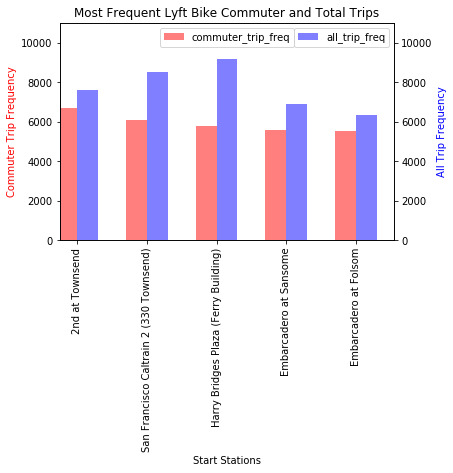

In [115]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.ylim([0,11000])
ax2 = ax1.twinx()
plt.ylim([0,11000])

Most_Freq.commuter_trip_freq.plot(kind='bar', color = 'r', ax = ax1, width=0.3, position =1, alpha=0.5)
Most_Freq.all_trip_freq.plot(kind='bar', color = 'b', ax = ax2, width=0.3, position =0, alpha=0.5)

ax1.set_title('Most Frequent Lyft Bike Commuter and Total Trips')
ax1.set_xlabel('Start Stations')
ax1.set_ylabel('Commuter Trip Frequency', color='r')
ax2.set_ylabel('All Trip Frequency', color='b')
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.show()

#### Recommendation 1: 
Based on the top 5 commuter trips, it appears that the percent of commuter trips to all trips for the same start and stop stations are between 63% to 88%. There may be opportunity to find more users of Lyft Bay Wheels in non-commuters. I recommend to advertise to noncommuters or potential users of these bicycles on weekends or on Monday through Fridays outside of the hours 8am through 6pm. We can do so by providing lower priced Single Rides or a cheaper monthly/annual membership for riders during non-commuter days and times.


#### The following analysis dives into the trip durations.


In [164]:
%%bigquery Trip_Durations

SELECT duration_bins, count(*) as trip_freq, count(*)/983648*100 as percent_of_all_trips
from
(
SELECT trip_id, duration_sec/60.0 as duration_mins, duration_sec/3600.0 as duration_hrs,
    CASE 
        WHEN duration_sec/60 <= 5  THEN "less than 5 minutes"
        WHEN duration_sec/60 > 5 and duration_sec/60 <= 30 THEN "5-30 minutes"
        WHEN duration_sec/60 > 30 and duration_sec/60 <= 120 THEN "30-120 minutes"
        WHEN duration_sec/60 >120 THEN "greater than 120 minutes"
        END AS duration_bins
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
)
GROUP BY duration_bins
ORDER BY trip_freq desc

In [165]:
Trip_Durations = Trip_Durations.set_index('duration_bins')
Trip_Durations

,trip_freq,percent_of_all_trips
duration_bins,,
5-30 minutes,756232,76.9
less than 5 minutes,180079,18.3
30-120 minutes,31136,3.2
greater than 120 minutes,16201,1.6


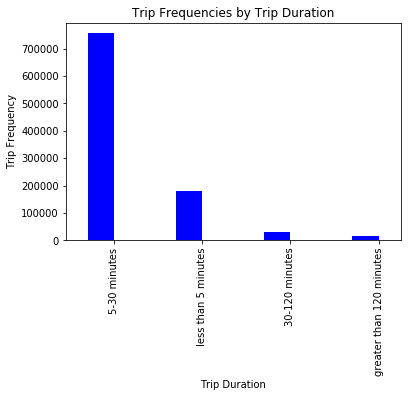

In [166]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
Trip_Durations.trip_freq.plot(kind='bar', color = 'b', ax = ax1, width=0.3, position =1)
ax1.set_title('Trip Frequencies by Trip Duration')
ax1.set_xlabel('Trip Duration')
ax1.set_ylabel('Trip Frequency')
plt.show()

#### Recommendation 2: 
While most trips occur between 5-30 minutes (as expected for a user needing to commute on a bike from one point to another), there are MANY trip durations of less than 5 minutes which represents 18.3% of all trips in the dataset. This could be due to bad data or users having technical difficulties when starting up the bike rental service. My recommendation is to determine if the are poor sensors on the bikes or if there were some bugs in the data collection process. If not, my recommendation is to provide an easier way for users to rent bikes, maybe through a click of a button on a smartphone. Specifically to offers, my recommendation is to offer greater incentives by giving a discount or free rentals for new users to offset their cost of learning how to activate and use these bikes in the beginning. 


#### The following analysis looks at bike availability at specific stations.


In [231]:
%%bigquery Bike_Avail

SELECT station_id, count(*) as mins_available
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE 
    bikes_available > 0
GROUP BY station_id
ORDER BY station_id

In [232]:
%%bigquery Bike_Not_Avail

SELECT station_id, count(*) as mins_unavailable
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE 
    bikes_available = 0
GROUP BY station_id
ORDER BY station_id

In [233]:
Bike_Not_Avail=Bike_Not_Avail.set_index('station_id')
Bike_Avail=Bike_Avail.set_index('station_id')
Bike_Not_Avail=Bike_Not_Avail.drop([87])     #needed to drop station_id 87 because it doesn't have an available bike which could be false data
Bike_Availability = pd.merge(Bike_Avail,Bike_Not_Avail, on='station_id')
Bike_Availability = Bike_Availability.sort_values(by='mins_unavailable', ascending=False)
Bike_Availability.head()

,mins_available,mins_unavailable
station_id,,
62,1512718,44844
45,1514869,44728
48,1523694,35903
60,1526617,32980
41,1527092,32505


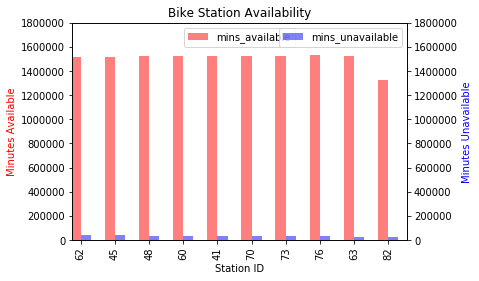

In [255]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.ylim([0,1800000])
ax2 = ax1.twinx()
plt.ylim([0,1800000])

Bike_Availability.head(10).mins_available.plot(kind='bar', color = 'r', ax = ax1, width=0.3, position =1, alpha=0.5)
Bike_Availability.head(10).mins_unavailable.plot(kind = 'bar', color = 'b', ax = ax2, width=0.3, position =0, alpha=0.5)

ax1.set_title('Bike Station Availability')
ax1.set_xlabel('Station ID')
ax1.set_ylabel('Minutes Available', color='r')
ax2.set_ylabel('Minutes Unavailable', color='b')
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.show()

In [268]:
%%bigquery Time_Unavail

SELECT Time_Unavailable, count(*) as Frequency
FROM
(SELECT 
    CASE 
           WHEN EXTRACT(HOUR FROM time) <= 5  OR EXTRACT(HOUR FROM time) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM time) >= 6 and EXTRACT(HOUR FROM time) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM time) >= 9 and EXTRACT(HOUR FROM time) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM time) >= 11 and EXTRACT(HOUR FROM time) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM time) >= 14 and EXTRACT(HOUR FROM time) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM time) >= 17 and EXTRACT(HOUR FROM time) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM time) >= 20 and EXTRACT(HOUR FROM time) <= 22 THEN "Evening"
           END AS Time_Unavailable
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE 
bikes_available = 0)
Group By Time_Unavailable
ORDER BY Frequency DESC

In [270]:
%%bigquery Time_Avail

SELECT Time_Available, count(*) as Frequency
FROM
(SELECT 
    CASE 
           WHEN EXTRACT(HOUR FROM time) <= 5  OR EXTRACT(HOUR FROM time) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM time) >= 6 and EXTRACT(HOUR FROM time) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM time) >= 9 and EXTRACT(HOUR FROM time) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM time) >= 11 and EXTRACT(HOUR FROM time) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM time) >= 14 and EXTRACT(HOUR FROM time) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM time) >= 17 and EXTRACT(HOUR FROM time) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM time) >= 20 and EXTRACT(HOUR FROM time) <= 22 THEN "Evening"
           END AS Time_Available
FROM `bigquery-public-data.san_francisco.bikeshare_status`
WHERE 
bikes_available > 0)
Group By Time_Available
ORDER BY Frequency DESC

In [271]:
Time_Unavail

,Time_Unavailable,Frequency
0,Afternoon,217929
1,Nightime,176459
2,Morning,125832
3,Mid Morning,123070
4,Early Afternoon,79779
5,Mid Day,70964
6,Evening,56797


In [272]:
Time_Avail

,Time_Available,Frequency
0,Nightime,31170139
1,Evening,13441896
2,Early Afternoon,13366240
3,Mid Day,13355438
4,Afternoon,13260179
5,Morning,13248748
6,Mid Morning,8808149


#### Recommendation 3: 
The initial idea was to determine if there needs to be more biking docks and bikes available at each station. The result from the Bike Station Availability bar plot shows that there aren't many times when a station has zero bikes and therefore, it is not recommended to increase station sizes. Further analysis on availability (instead of unavailability) of bikes showed that Nighttime and Evenings are when there are most bikes available (not being used). This is a revenue opportunity on sunk cost (cost of bikes sitting at a station not gearning revenue). While it is obvious that there would be less users during Nightime or Evenings, all other times (besides mid morning) have similar availability as Evenings and therefore, my recommendation is to advertise to users during morning, afternoon, midday, and early afternoon, with a pricing structure that would be cheaper at these times.

## Answer: My recommendations for offers based on my findings are:

#### Recommendation 1: 
Based on the top 5 commuter trips, it appears that the percent of commuter trips to all trips for the same start and stop stations are between 63% to 88%. There may be opportunity to find more users of Lyft Bay Wheels in non-commuters. I recommend to advertise to noncommuters or potential users of these bicycles on weekends or on Monday through Fridays outside of the hours 8am through 6pm. We can do so by providing lower priced Single Rides or a cheaper monthly/annual membership for riders during non-commuter days and times.


#### Recommendation 2: 
While most trips occur between 5-30 minutes (as expected for a user needing to commute on a bike from one point to another), there are MANY trip durations of less than 5 minutes which represents 18.3% of all trips in the dataset. This could be due to bad data or users having technical difficulties when starting up the bike rental service. My recommendation is to determine if the are poor sensors on the bikes or if there were some bugs in the data collection process. If not, my recommendation is to provide an easier way for users to rent bikes, maybe through a click of a button on a smartphone. Specifically to offers, my recommendation is to offer greater incentives by giving a discount or free rentals for new users to offset their cost of learning how to activate and use these bikes in the beginning. 


#### Recommendation 3: 
The initial idea was to determine if there needs to be more biking docks and bikes available at each station. The result from the Bike Station Availability bar plot shows that there aren't many times when a station has zero bikes and therefore, it is not recommended to increase station sizes. Further analysis on availability (instead of unavailability) of bikes showed that Nighttime and Evenings are when there are many bikes available and not being used. This is a revenue opportunity on sunk cost (cost of bikes sitting at a station not gaining earning revenue). While it is obvious that there would be less users during Nightime or evenings, all other times (besides mid morning) have similar availability as evenings and therefore, my recommendation is to advertise to users during morning, afternoon, midday, and early afternoon, with a pricing structure that would be cheaper at these times.